In [65]:
from furlib import *

def newton_raphson(J,b,X0,vals={},eps=1e-5,maxiter=1000):
    k = 0
    Jinv = J.inv().subs(vals)
    b = b.subs(vals)
    while True:
        x = (Jinv.subs(X0)*b.subs(X0)).evalf()
        if x.norm()<eps: break
        if k>maxiter: break
        for jj,ky in enumerate(X0):
            X0[ky] += (x[jj]).evalf()
        k += 1   
    return X0,x,k

In [26]:
rr = Robot((100,0,0,t1),(100,0,0,t2))

In [27]:
T = rr.T
eqx = T[0,3]
eqy = T[1,3]

In [85]:
px,py = -100,-100

In [86]:
f = Matrix([eqx-px, eqy-py])
J = f.jacobian([t1,t2])
X0 = {t1:0.2, t2:0.5}

sol,*_ = newton_raphson(J, -f, X0, eps=1e-8, maxiter=20)

In [87]:
eqx.subs(sol),eqy.subs(sol)

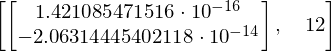

In [88]:
_